#### 필요 모듈 import

In [20]:
import pandas as pd
from datetime import datetime 

In [72]:

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

import platform

if platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')
else:
    print('Unknown system... sorry~~')

import seaborn as sns

#### 데이터 import 

In [166]:
unicorn = pd.read_csv("data/company_nps_data.csv", encoding="cp949")

In [167]:
unicorn.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151


#### 간단히 살펴보기 
- 5000개 기업에 대한 데이터 
- 결측값은 없음 
- 월별 직원수, 연금보험료에서 -인 값은 없고, 연매출액의 경우 -값이 있음 
- 2015년 ~ 2019년 데이터인데 기업마다 데이터의 수가 다름. 평균적으로 14개 존재.

In [168]:
unicorn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99801 entries, 0 to 99800
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   회사ID      99801 non-null  int64
 1   연매출액      99801 non-null  int64
 2   년도        99801 non-null  int64
 3   월         99801 non-null  int64
 4   월별_연금보험료  99801 non-null  int64
 5   월별_직원수    99801 non-null  int64
dtypes: int64(6)
memory usage: 4.6 MB


In [169]:
unicorn.describe()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
count,9.980100e+04,9.980100e+04,99801.000000,99801.000000,9.980100e+04,99801.000000
mean,2.762982e+05,3.053589e+07,2016.967125,6.714352,9.734079e+06,37.623431
std,1.339032e+05,3.016647e+08,0.976688,3.512966,4.347256e+07,146.947194
min,6.300000e+01,-7.882176e+06,2015.000000,1.000000,0.000000e+00,0.000000
25%,1.655300e+05,1.409760e+06,2016.000000,4.000000,1.181160e+06,6.000000
50%,2.591490e+05,3.573585e+06,2017.000000,7.000000,2.332760e+06,11.000000
75%,3.826560e+05,9.582321e+06,2018.000000,10.000000,5.591860e+06,24.000000
max,5.159723e+06,1.132878e+10,2019.000000,12.000000,9.780673e+08,3133.000000


In [170]:
unicorn["회사ID"].value_counts().describe()

count    5000.000000
mean       19.960200
std        11.519512
min         1.000000
25%        12.000000
50%        14.000000
75%        26.000000
max        50.000000
Name: 회사ID, dtype: float64

#### 회사의 규모/성장을 어떻게 판단할 수 있을까?
- 연매출액과 연금보험료, 연금보험료와 직원수, 직원수와 연매출액은 모두 양의 상관관계를 보임
- 직원수와 연금보험료의 경우, 직원의 임금에 따라 연금보험료를 지불하기 때문에 특히 상관관계가 강함
- 두 컬럼 중에서는 '직원수'만 사용해도 될 것으로 판단 (직원수가 일차적 지표 )

<AxesSubplot:>

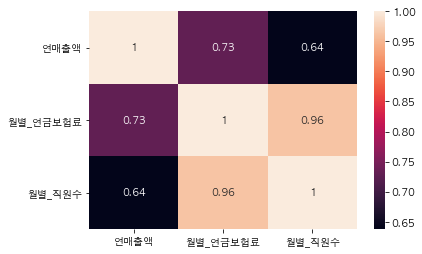

In [172]:
sns.heatmap(unicorn[['연매출액', '월별_연금보험료', '월별_직원수']].corr(), 
           annot=True)

In [173]:
unicorn[unicorn["연매출액"] >= 100000000]["회사ID"].unique()

array([231080, 130322, 232757, 127060, 130729, 231606, 419977, 510329,
       381180, 126606, 381344, 234236, 126831, 420082, 126664, 227414,
       128638, 420046, 129828, 127669, 126641,    102, 231703, 127511,
       126814, 420076, 294649, 440030, 128896, 403504, 403359, 294337,
       294530, 146654, 128539,     95, 294964, 126983,   2842, 297874,
       126521, 126772, 294620, 297327, 126516, 127090, 127180, 403351,
       128174, 127366, 419998, 294367, 130386, 231173, 127065, 154500,
       295805, 301484, 433492, 130577, 420008, 630190, 294790, 128440,
       403434, 403462, 126538, 403470, 426429, 227415, 130387,   8835,
       420237, 428817,  40860, 419945,     63, 295618, 126674, 469677,
       294387, 469458, 382850, 260890, 127202, 567650, 128485, 420092,
       231384,    597, 433756, 403522, 133951, 547586, 489849, 126802,
         5452, 430504, 296476, 420165, 580356, 439986, 439902])

#### 새로운 column 만들기 
- 1. 연/월 : 연도와 월을 합쳐서 연/월 컬럼을 구성
- 2. 연금보험료, 직원수 증가율

[참고] 

- 그런데 처리하고 나니 0이 있어서 증가율이 inf로 계산된 컬럼들이 발견됨 (주의!!)
- 보험료 증가율과 직원수 증가율은, (당연하지만) 우상향 하고 있음 

In [175]:
unicorn["월"] = unicorn["월"].apply(lambda x : str(x).zfill(2))

In [176]:
unicorn["년도"] = unicorn["년도"].astype(str)
unicorn["연월"] = unicorn["년도"] + "/" + unicorn["월"]

In [177]:
unicorn['연월'] = unicorn["연월"].apply(lambda x : datetime.strptime(x,'%Y/%m'))
unicorn['연월'] = unicorn['연월'].dt.to_period(freq = 'M') 

In [178]:
unicorn = unicorn.sort_values(by="연월")
unicorn["월별_보험료_증가율(%)"] = round(unicorn[["회사ID", "월별_연금보험료"]].groupby("회사ID").pct_change(), 4) * 100
unicorn["월별_직원수_증가율(%)"] = round(unicorn[["회사ID", "월별_직원수"]].groupby("회사ID").pct_change(), 4) * 100

<AxesSubplot:xlabel='월별_보험료_증가율(%)', ylabel='월별_직원수_증가율(%)'>

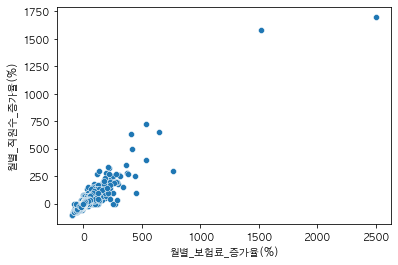

In [187]:
sns.scatterplot(data = unicorn,
                x = "월별_보험료_증가율(%)",
                y = "월별_직원수_증가율(%)")

#### 연매출액 확인 
- 2019년에도 데이터가 있는 회사가 많지 않음 (74개)
- 연매출액을 시각화했을 때, 2019년 데이터가 없더라도 매출은 낮지 않기 때문에 폐업했을 것이라는 추정은 불가 

In [179]:
revenue = unicorn[["회사ID", "연매출액", "년도"]]
revenue.drop_duplicates(inplace=True)

<ipython-input-179-b3d27cff738d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue.drop_duplicates(inplace=True)


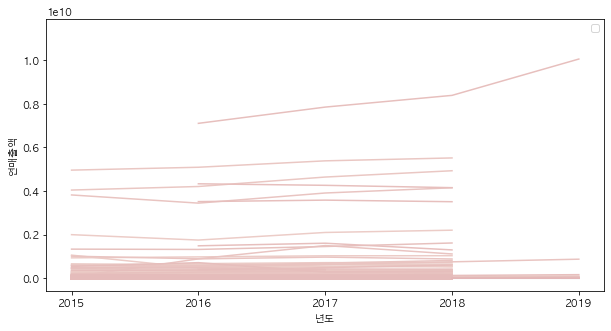

In [180]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=revenue, x="년도", y="연매출액", hue="회사ID")
plt.legend([])

In [186]:
temp = list(unicorn[unicorn["년도"] == "2019"]["회사ID"].unique())
print(f"2019년도에 데이터가 있는 회사의 수 : {len(temp)}개 \
\n리스트는 다음과 같음 : {temp}")

2019년도에 데이터가 있는 회사의 수 : 74개 
리스트는 다음과 같음 : [395238, 315996, 296819, 138077, 570867, 237625, 440911, 246826, 130261, 134575, 420165, 264486, 473265, 338722, 155754, 434171, 419945, 368448, 155829, 297542, 263195, 440884, 130023, 440559, 2037, 428380, 177377, 510449, 443698, 478922, 256445, 205415, 165163, 441424, 401386, 442525, 255015, 250472, 280967, 445499, 14271, 332916, 303882, 193239, 404192, 128174, 294367, 294028, 130756, 212335, 337323, 8208, 343863, 140370, 158004, 135668, 192812, 254479, 442376, 581504, 131998, 139442, 258745, 47306, 305146, 297682, 270460, 442467, 442798, 173916, 620445, 2693684, 3312354, 5159723]


#### 직원수 확인 
- 월별 직원수가 0명인 회사들이 11곳 존재함 
- 해당 회사들의 경우, 월별 직원수가 0~11명 사이로 제외해도 될 것으로 판단됨 

In [182]:
unicorn[unicorn["월별_직원수"] == 0]["회사ID"].unique()

array([288014, 478999, 291968, 277054, 217292, 439536, 157237, 472629,
       550603, 602137, 568445])

In [183]:
unicorn[unicorn["회사ID"].isin(list(unicorn[unicorn["월별_직원수"] == 0]["회사ID"].unique()))].sort_values(by="월별_직원수", ascending=False)

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,연월,월별_보험료_증가율(%),월별_직원수_증가율(%)
42386,472629,1915700,2018,04,2402520,11,2018-04,0.00,0.00
49802,472629,1915700,2018,03,2402520,11,2018-03,45.05,57.14
92177,472629,1915700,2018,05,2402520,11,2018-05,0.00,0.00
67145,472629,1915700,2018,06,2384520,11,2018-06,-0.75,0.00
63712,472629,1915700,2018,07,2384520,11,2018-07,0.00,0.00
...,...,...,...,...,...,...,...,...,...
82809,217292,245945,2016,06,0,0,2016-06,-100.00,-100.00
69239,157237,27020003,2017,05,0,0,2017-05,-100.00,-100.00
7251,288014,3709457,2016,11,0,0,2016-11,NaN,NaN
64139,472629,1915700,2018,01,0,0,2018-01,-100.00,-100.00


In [184]:
data = unicorn.groupby("회사ID").mean().sort_values(by="월별_직원수_증가율(%)", ascending=False)
data.head(5)

,연매출액,월별_연금보험료,월별_직원수,월별_보험료_증가율(%),월별_직원수_증가율(%)
회사ID,,,,,
472629,1.516086e+06,1.177962e+06,6.416667,inf,inf
478999,3.609783e+05,3.619483e+05,2.916667,inf,inf
291968,4.395648e+06,6.844762e+05,2.884615,inf,inf
277054,9.547800e+04,2.452500e+05,2.000000,inf,inf
568445,7.402450e+05,4.725000e+05,1.500000,inf,inf


<AxesSubplot:xlabel='월별_보험료_증가율(%)', ylabel='월별_직원수_증가율(%)'>

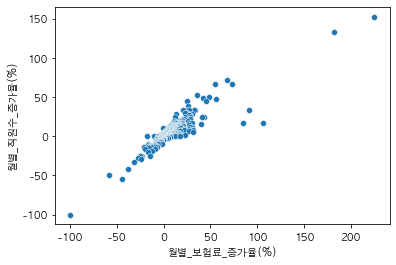

#### 매출 75% 이상, 직원수 75% 이상에 들어가는 기업은 몇 곳? (주관적 생각)

In [195]:
set1 = set(unicorn[unicorn["월별_직원수"] >= unicorn["월별_직원수"].describe()["75%"]]["회사ID"].unique())
set2 = set(unicorn[unicorn["연매출액"] >= unicorn["연매출액"].describe()["75%"]]["회사ID"].unique())
print("두 기준을 모두 충족하는 기업은 몇 군데?", len(set1 & set2))

두 기준을 모두 충족하는 기업은 몇 군데? 663


#### 매출 1000억 이상, 직원수 75% 이상에 들어가는 기업은 몇 곳? (주관적 생각)

In [197]:
set1 = set(unicorn[unicorn["월별_직원수"] >= unicorn["월별_직원수"].describe()["75%"]]["회사ID"].unique())
set2 = set(unicorn[unicorn["연매출액"] >= 100000000]["회사ID"].unique())
print("두 기준을 모두 충족하는 기업은 몇 군데?", len(set1 & set2))

두 기준을 모두 충족하는 기업은 몇 군데? 95


#여기까지 진행하고 든 생각 
- zscore 후 증감을 판단해야 했을까?